<a href="https://colab.research.google.com/github/jayalekshmiks112/Jayalekshmi_K_S.github.io/blob/main/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORTING THE REQUIRED

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

###LOADING AND SPLITTING DATA

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


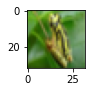

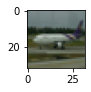

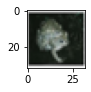

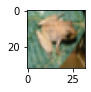

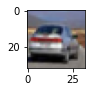

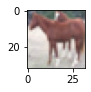

In [ ]:
for i in range(232,238):
  plt.subplot(120+ 1 + i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()
    

###PREPROCESSING THE DATA

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /=255
x_test /=255
n_classes =10

print("Shape before one-hot encoding: ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding: ",y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


###BUILDING THE MODEL

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model=Sequential() 
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500,activation='relu')) 
model.add(Dropout(0.4)) 
model.add(Dense(250,activation='relu')) 
model.add(Dropout(0.3)) 

#output layer
model.add(Dense(10,activation='softmax'))

#compiling 
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#training the model
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 595s 2s/step - loss: 1.5955 - accuracy: 0.4112 - val_loss: 1.2327 - val_accuracy: 0.5632
Epoch 2/10
391/391 [==============================] - 559s 1s/step - loss: 1.1117 - accuracy: 0.6058 - val_loss: 0.9083 - val_accuracy: 0.6855
Epoch 3/10
391/391 [==============================] - 561s 1s/step - loss: 0.9318 - accuracy: 0.6740 - val_loss: 0.8432 - val_accuracy: 0.7074
Epoch 4/10
391/391 [==============================] - 562s 1s/step - loss: 0.8175 - accuracy: 0.7147 - val_loss: 0.7592 - val_accuracy: 0.7443
Epoch 5/10
391/391 [==============================] - 559s 1s/step - loss: 0.7381 - accuracy: 0.7417 - val_loss: 0.7217 - val_accuracy: 0.7507
Epoch 6/10
391/391 [==============================] - 561s 1s/step - loss: 0.6708 - accuracy: 0.7649 - val_loss: 0.6991 - val_accuracy: 0.7564
Epoch 7/10
391/391 [==============================] - 564s 1s/step - loss: 0.6093 - accuracy: 0.7850 - val_loss: 0.6837 - val_accuracy: 0.7710

###PREDICTING

In [ ]:
classes= range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes,names))

#generate batch of 9 images to predict
batch= x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose=1)


1/1 [==============================] - 0s 50ms/step


In [ ]:
print(predictions)

[[2.63972033e-04 1.31773340e-05 2.26634499e-02 1.39484489e-02
  3.32063168e-01 3.32751758e-02 9.77513380e-04 5.96634626e-01
  6.07410184e-05 9.98100586e-05]
 [9.31513787e-05 1.10774927e-05 3.17864344e-02 7.01818392e-02
  3.82097326e-02 7.41481543e-01 5.99715719e-03 1.11879967e-01
  5.84531917e-05 3.00663960e-04]
 [1.79831586e-05 3.84260602e-05 1.13495789e-03 9.81838349e-03
  3.84495623e-04 1.94807455e-03 9.86512542e-01 7.06944847e-05
  4.06475228e-05 3.37888887e-05]
 [1.47566956e-04 1.52337074e-04 2.99010403e-03 9.07055318e-01
  1.50628509e-02 3.16045620e-02 3.67784724e-02 2.68371147e-03
  5.50297729e-04 2.97490391e-03]
 [6.84871626e-09 9.99903917e-01 4.44072811e-13 6.83610774e-13
  1.09809523e-16 8.25954363e-15 3.33940178e-13 2.32304325e-14
  3.98664980e-07 9.56981748e-05]
 [9.13239944e-07 9.99168754e-01 1.22089048e-07 2.97267437e-08
  2.44668508e-10 1.72286796e-09 2.50767414e-07 6.04143735e-10
  2.71395693e-05 8.02784925e-04]
 [2.55037576e-01 6.49427548e-02 1.13580830e-01 2.35294193e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0
1.0
1.0000001
1.0
0.99999994
0.99999994
0.99999994
0.99999994


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[7 5 6 3 1 1 0 6 8]


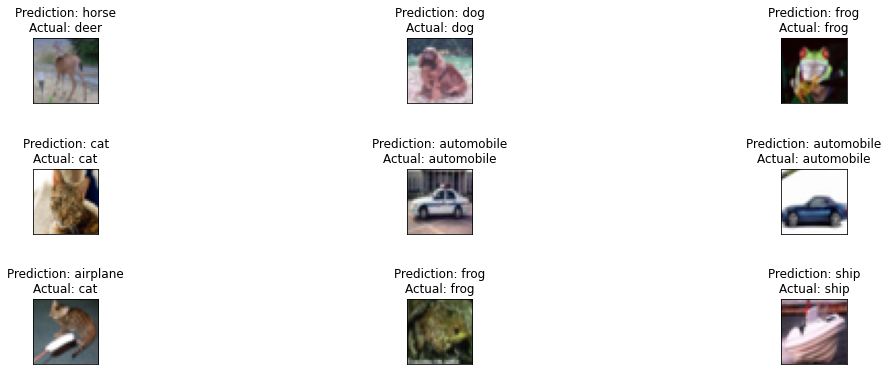

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()